# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Index_Count = 0
Count = 1

In [5]:
# Save API_key information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    city_query = query_url + city
    response = requests.get(city_query).json()
    
    try:
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
        if Index_Count > 49:
            Index_Count = 0
            Count += 1
        else:
            Index_Count += 1
            
        print(f'Processing Record {Index_Count} of Set {Count} : {city}')
    
    except(KeyError, IndexError):
        print('City not found. Skipping...')
        
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 : mataura
Processing Record 2 of Set 1 : bluff
Processing Record 3 of Set 1 : kapaa
Processing Record 4 of Set 1 : busselton
Processing Record 5 of Set 1 : provideniya
Processing Record 6 of Set 1 : geraldton
Processing Record 7 of Set 1 : racoasa
Processing Record 8 of Set 1 : abapo
Processing Record 9 of Set 1 : guerrero negro
Processing Record 10 of Set 1 : ushuaia
Processing Record 11 of Set 1 : saint-philippe
Processing Record 12 of Set 1 : taonan
Processing Record 13 of Set 1 : upernavik
Processing Record 14 of Set 1 : hilo
Processing Record 15 of Set 1 : evanston
Processing Record 16 of Set 1 : punta arenas
Processing Record 17 of Set 1 : severo-yeniseyskiy
Processing Record 18 of Set 1 : ribeira grande
City not found. Skipping...
Processing Record 19 of Set 1 : cape town
Processing Record 20 of Set 1 : vaini
Processing Record 21 of Set 1 : saint-georges
Processing Record 22 of Set 1 : forssa
Processi

Processing Record 36 of Set 4 : port blair
Processing Record 37 of Set 4 : manosque
Processing Record 38 of Set 4 : new norfolk
Processing Record 39 of Set 4 : lillooet
Processing Record 40 of Set 4 : mangrol
City not found. Skipping...
Processing Record 41 of Set 4 : bengkulu
Processing Record 42 of Set 4 : urucara
Processing Record 43 of Set 4 : dunedin
Processing Record 44 of Set 4 : kokstad
Processing Record 45 of Set 4 : cockburn town
Processing Record 46 of Set 4 : pekalongan
City not found. Skipping...
Processing Record 47 of Set 4 : kimparana
Processing Record 48 of Set 4 : mahebourg
Processing Record 49 of Set 4 : mar del plata
Processing Record 50 of Set 4 : noumea
Processing Record 0 of Set 5 : kruisfontein
Processing Record 1 of Set 5 : ostrovnoy
Processing Record 2 of Set 5 : aljezur
Processing Record 3 of Set 5 : pevek
Processing Record 4 of Set 5 : krasnoselkup
Processing Record 5 of Set 5 : sadasivpet
Processing Record 6 of Set 5 : abaete
Processing Record 7 of Set 5 : 

Processing Record 19 of Set 8 : wajima
Processing Record 20 of Set 8 : san rafael
Processing Record 21 of Set 8 : hambantota
Processing Record 22 of Set 8 : ulaanbaatar
Processing Record 23 of Set 8 : redmond
Processing Record 24 of Set 8 : ponazyrevo
Processing Record 25 of Set 8 : chicama
Processing Record 26 of Set 8 : chimbote
Processing Record 27 of Set 8 : bismarck
Processing Record 28 of Set 8 : alice springs
Processing Record 29 of Set 8 : hovd
Processing Record 30 of Set 8 : faya
Processing Record 31 of Set 8 : mount gambier
Processing Record 32 of Set 8 : maningrida
Processing Record 33 of Set 8 : yambio
City not found. Skipping...
Processing Record 34 of Set 8 : matara
Processing Record 35 of Set 8 : kilindoni
Processing Record 36 of Set 8 : zapolyarnyy
Processing Record 37 of Set 8 : ayorou
Processing Record 38 of Set 8 : hamilton
Processing Record 39 of Set 8 : surbo
Processing Record 40 of Set 8 : ulaangom
Processing Record 41 of Set 8 : kijang
Processing Record 42 of Set

Processing Record 6 of Set 12 : wahpeton
Processing Record 7 of Set 12 : saryg-sep
Processing Record 8 of Set 12 : beringovskiy
Processing Record 9 of Set 12 : bilma
Processing Record 10 of Set 12 : lasa
Processing Record 11 of Set 12 : ulkan
Processing Record 12 of Set 12 : tabuk
Processing Record 13 of Set 12 : keti bandar
Processing Record 14 of Set 12 : sabha
Processing Record 15 of Set 12 : puerto madryn
Processing Record 16 of Set 12 : eureka
Processing Record 17 of Set 12 : ostersund
Processing Record 18 of Set 12 : cayenne
Processing Record 19 of Set 12 : birnin kebbi
Processing Record 20 of Set 12 : huangnihe
City not found. Skipping...
Processing Record 21 of Set 12 : bose
Processing Record 22 of Set 12 : mahad
Processing Record 23 of Set 12 : palauig
------------------------
Data Retrieval Complete
------------------------


Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weatherpy_dict = pd.DataFrame({
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date,
})
weatherpy_data = pd.DataFrame(weatherpy_dict)
weatherpy_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,61.00,71,71,5.01,NZ,1603937847
1,Bluff,-46.60,168.33,61.00,71,72,5.01,NZ,1603937809
2,Kapaa,22.08,-159.32,77.00,83,90,3.36,US,1603937795
3,Busselton,-33.65,115.33,73.00,33,0,10.60,AU,1603937850
4,Provideniya,64.38,-173.30,26.60,68,0,4.47,RU,1603938174
...,...,...,...,...,...,...,...,...,...
579,Birnin Kebbi,12.45,4.20,77.31,27,0,4.76,NG,1603938316
580,Huangnihe,43.56,128.02,38.79,61,0,12.08,CN,1603938316
581,Bose,45.46,8.01,48.00,89,100,2.15,IT,1603938316
582,Mahād,18.08,73.42,75.81,77,21,3.00,IN,1603938317


In [8]:
weatherpy_data.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.00,584.00,584.00,584.00,584.00,584.00,5.840000e+02
mean,19.67,14.91,57.44,74.53,49.27,7.38,1.603938e+09
std,34.15,92.29,21.49,19.31,40.55,5.47,1.772800e+02
min,-54.80,-179.17,-9.54,7.00,0.00,0.45,1.603937e+09
25%,-9.70,-67.96,43.00,65.00,1.00,3.36,1.603938e+09
50%,26.27,15.28,61.62,79.00,42.50,5.82,1.603938e+09
75%,48.21,97.94,75.21,88.25,90.00,10.29,1.603938e+09
max,78.22,179.32,98.60,100.00,100.00,44.27,1.603938e+09


In [26]:
weatherpy_data.to_csv('Output/raw_data.csv', index = False, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

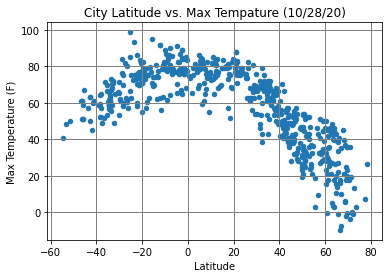

In [27]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Max Temp')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Tempature (10/28/20)')
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

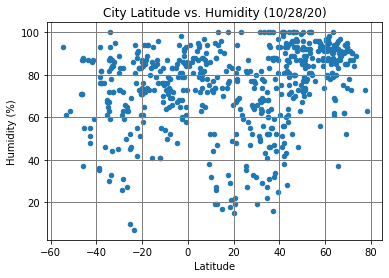

In [28]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Humidity')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/28/20)')
plt.savefig("Images/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

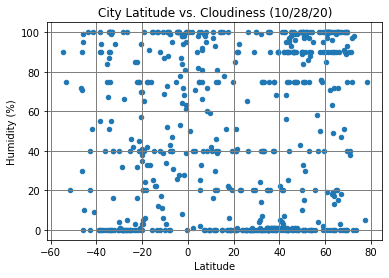

In [29]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Cloudiness (10/28/20)')
plt.savefig("Images/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

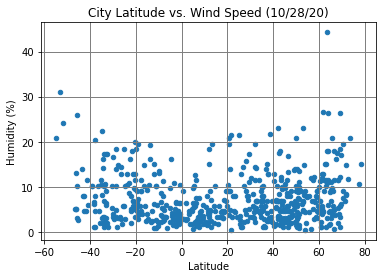

In [30]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Wind Speed (10/28/20)')
plt.savefig("Images/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [31]:
northern_hem = weatherpy_data.loc[weatherpy_data['Lat'] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:  -0.8633866203925769


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


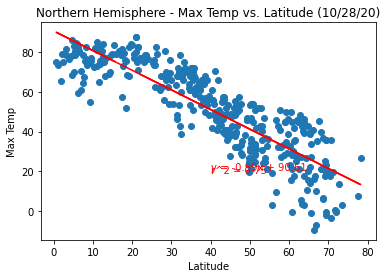

In [32]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is: " , (rvalue))

regress_values = x_values * slope + intercept
northern_hem['regress max temp'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
southern_hem = weatherpy_data.loc[weatherpy_data['Lat'] < 0]

The r-value is: 0.6956861954136272


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


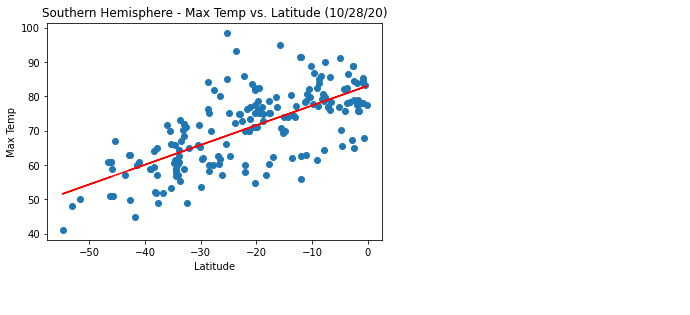

In [33]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Max Temp'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3067563902305573


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


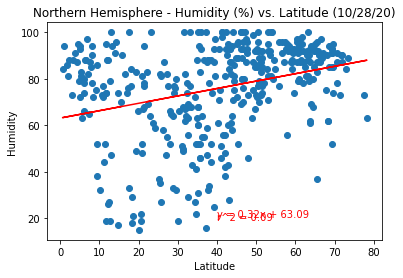

In [34]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
northern_hem['regress Humidity'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1383005159552214


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


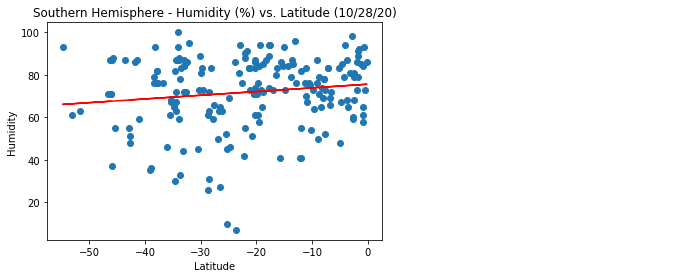

In [35]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Humidity'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18684473096156873


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


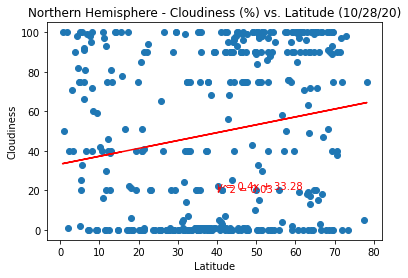

In [36]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

# Get regression values
regress_values = x_values * slope + intercept
northern_hem['regress Cloudiness'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13527181693907864


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


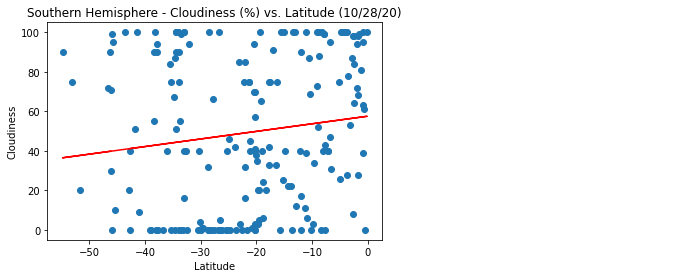

In [37]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Cloudiness'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22915773106756085


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


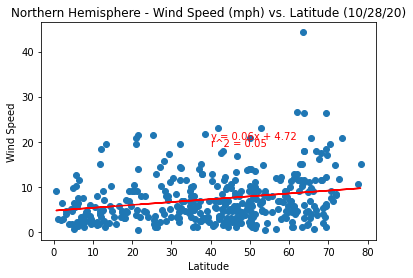

In [38]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
northern_hem['regress Wind Speed'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3212393849389925


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


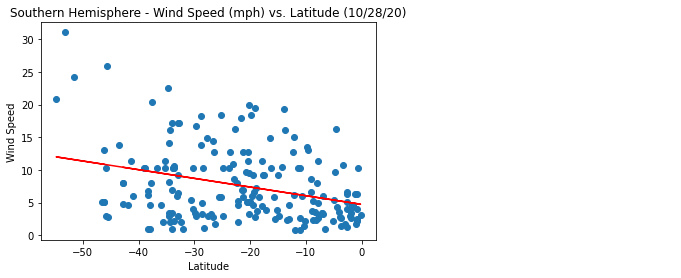

In [39]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Wind Speed'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude (10/28/20)')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()